In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
ima_ov = pd.read_csv("data/ima/ima_2021_ov_per_province.csv")

ima_ov = ima_ov.melt(
    id_vars=["provincie", "vervoerwijze"], 
    value_vars=["2030-L", "2030-H", "2040-L", "2040-H", "2050-L", "2050-H"],
    var_name="year",
    value_name="value"
)

ima_ov["scenario"] = ima_ov["year"].apply(lambda x: x.split("-")[1])
ima_ov["year"] = ima_ov["year"].apply(lambda x: int(x.split("-")[0]))

ima_ov

,provincie,vervoerwijze,year,value,scenario
0,Groningen,Trein,2030,119,L
1,Groningen,BTM,2030,102,L
2,Groningen,Fiets,2030,104,L
3,Friesland,Trein,2030,111,L
4,Friesland,BTM,2030,91,L
...,...,...,...,...,...
211,Noord-Brabant,BTM,2050,115,H
212,Noord-Brabant,Fiets,2050,110,H
213,Limburg,Trein,2050,121,H
214,Limburg,BTM,2050,104,H


AttributeError: PatchCollection.set() got an unexpected keyword argument 'linecolor'

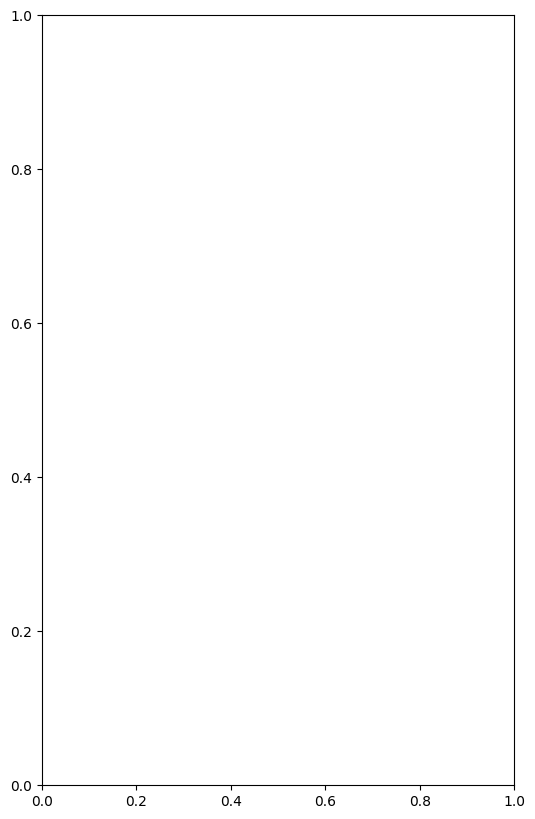

In [9]:
mapdf = gpd.read_file("https://stacks.stanford.edu/file/druid:st293bj4601/data.zip")
mapdf = mapdf[mapdf["TYPE_1"] == "Provincie"]
mapdf.sort_values("NAME_1", inplace=True)

mapdf.plot(column="ID_1", figsize=(10,10), legend=True)
plt.axis('off')